# Regressão

In [1]:
#Bibliotecas

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import numpy as np

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
#Dados
data = pd.read_csv('dataset.csv')

In [4]:
data.shape

(1000000, 8)

In [5]:
data.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Análise exploratória e Feature engineering


In [7]:
#Valores faltantes

print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(data)}')
data.dropna(inplace=True)
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(data)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 1000000
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999990


In [8]:
#Distribuição das features
data.describe(include='all').T.round(2)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
key,999990,999990,2009-06-15 17:26:21.0000001,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fare_amount,999990.0,NaN,NaN,NaN,11.347953,9.82179,-44.9,6.0,8.5,12.5,500.0
pickup_datetime,999990,861747,2010-02-13 19:28:00 UTC,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pickup_longitude,999990.0,NaN,NaN,NaN,-72.526699,12.057778,-3377.680935,-73.99206,-73.981792,-73.967094,2522.271325
pickup_latitude,999990.0,NaN,NaN,NaN,39.92904,7.626087,-3116.285383,40.734965,40.752695,40.767154,2621.62843
dropoff_longitude,999990.0,NaN,NaN,NaN,-72.52786,11.324494,-3383.296608,-73.991385,-73.980135,-73.963654,45.581619
dropoff_latitude,999990.0,NaN,NaN,NaN,39.919954,8.201418,-3114.338567,40.734046,40.753166,40.768129,1651.553433
passenger_count,999990.0,NaN,NaN,NaN,1.684941,1.323907,0.0,1.0,1.0,2.0,208.0


## Análise das features (e do Target)

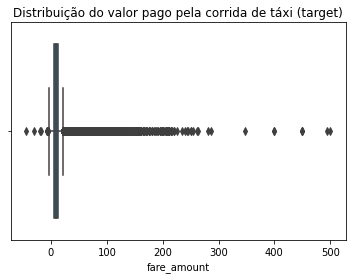

In [9]:
sns.boxplot(data.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target)");

In [10]:
len(data.loc[(data.fare_amount < 1)])

75

In [11]:
len(data.loc[(data.fare_amount > 100)])

396

In [12]:
#Remover outliers
data = data.loc[(data.fare_amount >=1) & (data.fare_amount <= 100)]

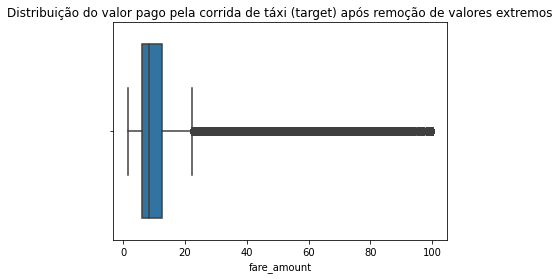

In [13]:
sns.boxplot(data.fare_amount).set_title('Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos');

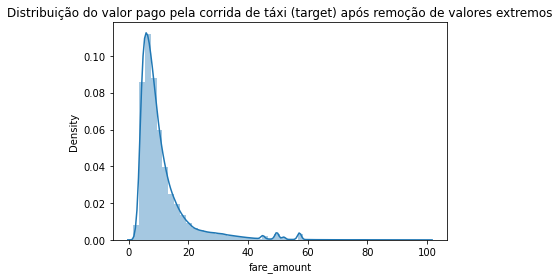

In [14]:
sns.distplot(data.fare_amount).set_title("Distribuição do valor pago pela corrida de táxi (target) após remoção de valores extremos");

In [15]:
#Converte pick_datetime para data
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S UTC')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999519 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key                999519 non-null  object        
 1   fare_amount        999519 non-null  float64       
 2   pickup_datetime    999519 non-null  datetime64[ns]
 3   pickup_longitude   999519 non-null  float64       
 4   pickup_latitude    999519 non-null  float64       
 5   dropoff_longitude  999519 non-null  float64       
 6   dropoff_latitude   999519 non-null  float64       
 7   passenger_count    999519 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 68.6+ MB


In [16]:
data['pickup_datetime']

0        2009-06-15 17:26:21
1        2010-01-05 16:52:16
2        2011-08-18 00:35:00
3        2012-04-21 04:30:42
4        2010-03-09 07:51:00
                 ...        
999995   2014-09-13 21:44:38
999996   2010-09-20 14:50:37
999997   2013-04-26 14:03:00
999998   2011-07-08 00:29:00
999999   2009-12-31 14:30:00
Name: pickup_datetime, Length: 999519, dtype: datetime64[ns]

In [17]:
#Quebra pickup time em diversas features diferentes
data['pickup_hour'] = data['pickup_datetime'].apply(lambda x:x.hour)
data['pickup_day_of_week'] = data['pickup_datetime'].apply(lambda x:x.weekday())
data['pickup_day'] = data['pickup_datetime'].apply(lambda x:x.day)
data['pickup_month'] = data['pickup_datetime'].apply(lambda x:x.month)
data['pickup_year'] = data['pickup_datetime'].apply(lambda x:x.year)

In [18]:
data.head(3)

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,0,15,6,2009
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,1,5,1,2010
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,3,18,8,2011


### Horário

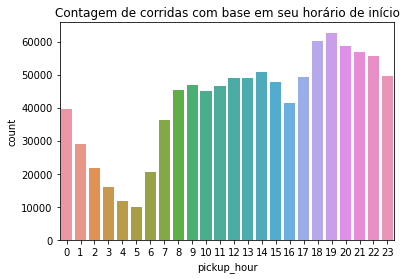

In [19]:
sns.countplot(data['pickup_hour']).set_title('Contagem de corridas com base em seu horário de início');

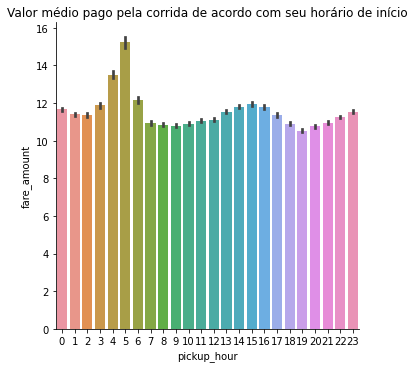

In [20]:
sns.catplot(x='pickup_hour',y='fare_amount',data=data,kind='bar').set(title='Valor médio pago pela corrida de acordo com seu horário de início');

### Dia da Semana

In [21]:
#Converte os dias da semana
def convert_day_of_week(day_of_week):
  day_dict={0:'Segunda',1:'Terça',2:'Quarta',3:'Quinta',4:'Sexta',5:'Sábado',6:'Domingo'}
  return day_dict[day_of_week]

In [22]:
data['pickup_day_of_week_name'] = data['pickup_day_of_week'].apply(lambda x:convert_day_of_week(x))

In [23]:
week_day_name = ['Segunda','Terça','Quarta','Quinta','Sexta','Sábado','Domingo']

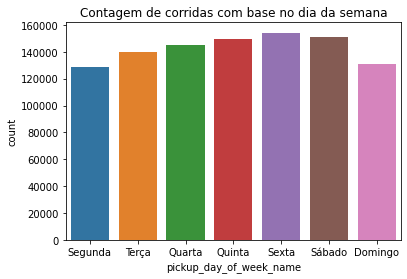

In [24]:
sns.countplot(data['pickup_day_of_week_name'],order=week_day_name).set_title('Contagem de corridas com base no dia da semana');

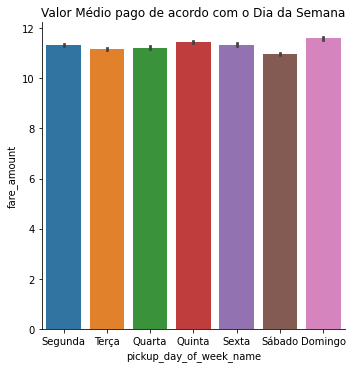

In [25]:
sns.catplot(x='pickup_day_of_week_name',y='fare_amount',data=data,
              order = week_day_name,kind='bar').set(title='Valor Médio pago de acordo com o Dia da Semana');

### Dia

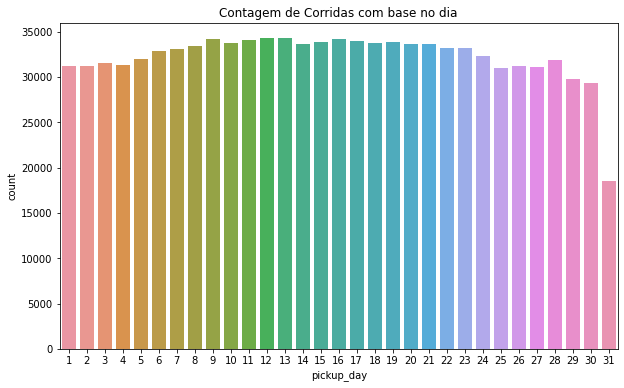

In [26]:
plt.figure(figsize=(10,6))
ax = sns.countplot(data['pickup_day']).set_title('Contagem de Corridas com base no dia')
ax;

### Latitude e Longitude

In [27]:
data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe().round(2)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999519.00,999519.00,999519.00,999519.00
mean,39.93,-72.53,39.92,-72.53
std,7.62,12.05,8.20,11.31
min,-3116.29,-3377.68,-3114.34,-3383.30
25%,40.73,-73.99,40.73,-73.99
50%,40.75,-73.98,40.75,-73.98
75%,40.77,-73.97,40.77,-73.96
max,2621.63,2522.27,1651.55,45.58


In [28]:
#Remove latitude e longitude fora do intervalo
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(data)}')
data = data.loc[(data.pickup_latitude>=-90) & (data.pickup_latitude<=90)]
data = data.loc[(data.pickup_longitude>=-180) & (data.pickup_longitude<=180)]
data = data.loc[(data.dropoff_latitude>=-90) & (data.dropoff_latitude<=90)]
data = data.loc[(data.dropoff_longitude>=-180) & (data.dropoff_longitude<=180)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(data)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999519
Tamanho conjunto de dados (depois da remoção de valores faltantes): 999479


In [29]:
data[['pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude']].describe().round(2)

,pickup_latitude,pickup_longitude,dropoff_latitude,dropoff_longitude
count,999479.00,999479.00,999479.00,999479.00
mean,39.93,-72.52,39.93,-72.52
std,6.09,10.39,6.09,10.39
min,-74.02,-128.18,-74.04,-121.39
25%,40.73,-73.99,40.73,-73.99
50%,40.75,-73.98,40.75,-73.98
75%,40.77,-73.97,40.77,-73.96
max,69.40,40.85,81.51,45.58


### Pontos de origem da corrida

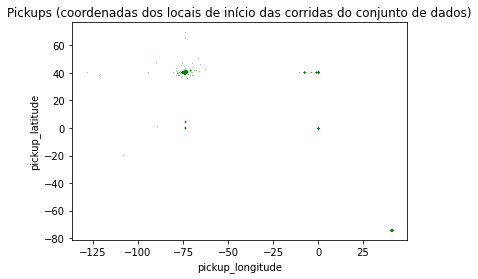

In [30]:
data.plot(kind='scatter',x='pickup_longitude',y='pickup_latitude',color='green',s=.08,alpha=.6)
plt.title('Pickups (coordenadas dos locais de início das corridas do conjunto de dados)');

In [31]:
long_interval = (-74.04, -73.75)
lat_interval = (40.63, 40.88)

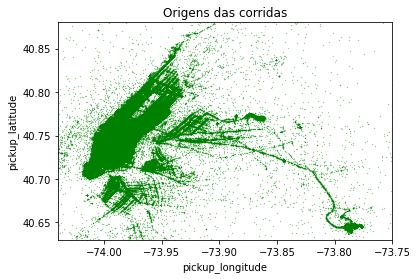

In [32]:
data.plot(kind='scatter', x='pickup_longitude', y='pickup_latitude',
                color='green', 
                s=.08, alpha=.6)
plt.title("Origens das corridas")
plt.ylim(lat_interval)
plt.xlim(long_interval);

In [33]:
print(f'Tamanho conjunto de dados (antes da remoção de valores faltantes): {len(data)}')
data = data.loc[(data.pickup_latitude>=40.63) & (data.pickup_latitude<=40.88)]
data = data.loc[(data.pickup_longitude>=-74.04) & (data.pickup_longitude<=-73.75)]
data = data.loc[(data.dropoff_latitude>=40.63) & (data.dropoff_latitude<=40.88)]
data = data.loc[(data.dropoff_longitude>=-74.04) & (data.dropoff_longitude<=-73.75)]
print(f'Tamanho conjunto de dados (depois da remoção de valores faltantes): {len(data)}')

Tamanho conjunto de dados (antes da remoção de valores faltantes): 999479
Tamanho conjunto de dados (depois da remoção de valores faltantes): 970979


## Correlação

In [34]:
mask = np.zeros_like(data.corr(),dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

In [35]:
cmap = sns.diverging_palette(220,10,as_cmap=True)

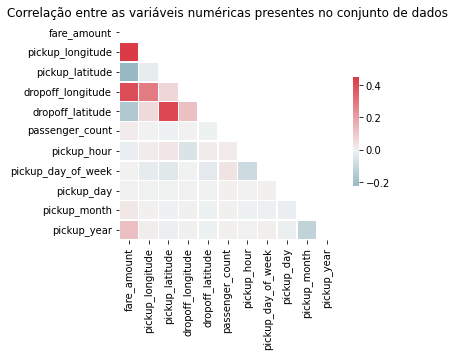

In [36]:
sns.heatmap(data.corr(),mask=mask,cmap=cmap,center=0,
            square = True, linewidths=.5,cbar_kws={"shrink": .5}).set_title("Correlação entre as variáveis numéricas presentes no conjunto de dados");

## Regressão Linear Simples

In [37]:
from sklearn.linear_model import LinearRegression

In [38]:
data['abs_diff_longitude'] = (data.dropoff_longitude - data.pickup_longitude).abs()
data['abs_diff_latitude'] = (data.dropoff_latitude - data.pickup_latitude).abs()

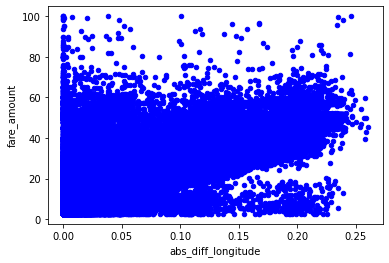

<Figure size 864x576 with 0 Axes>

In [39]:
#Scatterplot
ax = data.plot(kind='scatter', x='abs_diff_longitude', y='fare_amount',
                color='blue',
                )

plt.figure(figsize=(12,8))
ax;

In [40]:
#Correlação
data.fare_amount.corr(data.abs_diff_longitude).round(2)

0.83

### Treino e Teste

In [41]:
Y = data['fare_amount']
del data['fare_amount']
X = data

In [42]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.30,random_state=42)

In [43]:
print(X_train.shape)
X_train.head(1)

(679685, 15)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
709120,2011-08-09 22:36:00.000000137,2011-08-09 22:36:00,-73.980372,40.761062,-74.009357,40.714847,3,22,1,9,8,2011,Terça,0.028985,0.046215


In [44]:
print(Y_test.shape)
X_test.head()

(291294,)


,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_hour,pickup_day_of_week,pickup_day,pickup_month,pickup_year,pickup_day_of_week_name,abs_diff_longitude,abs_diff_latitude
664250,2009-06-19 20:53:16.0000003,2009-06-19 20:53:16,-73.983211,40.738945,-73.966732,40.763325,1,20,4,19,6,2009,Sexta,0.016479,0.024380
967459,2014-10-08 15:16:00.000000137,2014-10-08 15:16:00,-73.997461,40.736760,-73.985010,40.724253,1,15,2,8,10,2014,Quarta,0.012451,0.012507
877364,2012-10-18 13:47:00.000000114,2012-10-18 13:47:00,-73.980708,40.785050,-73.873110,40.774340,1,13,3,18,10,2012,Quinta,0.107598,0.010710
985722,2015-05-24 04:53:26.0000002,2015-05-24 04:53:26,-73.988838,40.763611,-73.991539,40.691631,2,4,6,24,5,2015,Domingo,0.002701,0.071980
460604,2014-07-20 21:29:00.00000091,2014-07-20 21:29:00,-73.991818,40.764627,-74.007248,40.741232,1,21,6,20,7,2014,Domingo,0.015430,0.023395


### Treinamento do modelo

In [45]:
#Instancia a regressão linear
lm = LinearRegression()

#Feature para treinar o modelo
lm.fit(X_train[['abs_diff_longitude']],Y_train)

LinearRegression()

In [46]:
# para fazer a predição também só devemos utilizar a feature fornecida no treinamento
Y_pred = lm.predict(X_test[['abs_diff_longitude']])

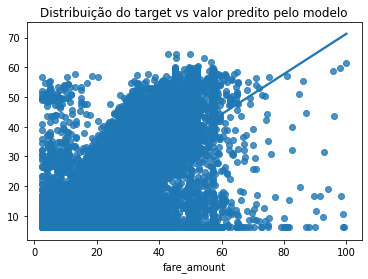

In [47]:
# para fazer a predição também só devemos utilizar a feature fornecida no treinamento
_ = sns.regplot(x=Y_test, y=Y_pred).set_title("Distribuição do target vs valor predito pelo modelo");

In [48]:
# vamos pegar de exemplo o caso em que a diferença das longitudes é de 0.1067120000000017
example = X_test[['abs_diff_longitude']].iloc[0][0]
example.round(2)

0.02

In [49]:
#Aqui conseguimos pegar os coeficientes que compõem a equação da regressão linear
beta = lm.coef_
intercept = lm.intercept_
print(beta)
print(intercept)

[225.18209068]
6.085536825873544


In [50]:
# Y = (225.37880345 * example) + 6.081784576615056
((beta[0]*example) + intercept).round(4)

9.7963

In [51]:
Y_pred[0]

9.796312498147076

# Métricas de avaliação

In [52]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [53]:
mse = mean_squared_error(Y_test,Y_pred)

In [54]:
mse.round(2)

25.14

In [55]:
mae = mean_absolute_error(Y_test,Y_pred)
mae.round(2)

3.2

In [56]:
r2_score(Y_test,Y_pred).round(2)

0.68

In [57]:
median = Y_train.median()
median

8.5

In [58]:
X_test['median_fare_amount'] = median

In [59]:
mae = mean_absolute_error(Y_test,X_test['median_fare_amount'])
mae.round(2)

5.14

In [60]:
r2_score(Y_test, X_test['median_fare_amount']).round(2)

-0.08

In [61]:
Y_pred = lm.predict(X_test[['abs_diff_latitude']])

In [62]:
beta = lm.coef_
intercept = lm.intercept_
print(beta)
print(intercept)

[225.18209068]
6.085536825873544


In [63]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

3.703131097196565

In [64]:
r2_score(Y_test, Y_pred)

0.4517018486519012

## Regressão Linear Múltipla

In [65]:
columns = ['pickup_longitude','pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']

In [66]:
lm.fit(X_train[columns],Y_train)

LinearRegression()

In [67]:
Y_pred= lm.predict(X_test[columns])

In [68]:
beta=lm.coef_
intercept=lm.intercept_

In [69]:
beta.tolist()

[14.857947343531572,
 2.8685654979655375,
 7.522422358295942,
 -18.364008322902322,
 0.04106193613003917,
 0.01144275656751148,
 -0.033387157883053575,
 0.00121034449424684,
 0.06796193146674323,
 0.4892266773522387,
 160.52356453096937,
 137.59392675726528]

In [70]:
intercept

1306.946150510743

In [71]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2.361598392711047

In [72]:
r2_score(Y_test, Y_pred)

0.7746563186784614

In [73]:
weights = pd.DataFrame(list(zip(columns,lm.coef_.tolist())),columns=['names','coefs'])
weights

,names,coefs
0,pickup_longitude,14.857947
1,pickup_latitude,2.868565
2,dropoff_longitude,7.522422
3,dropoff_latitude,-18.364008
4,passenger_count,0.041062
5,pickup_hour,0.011443
6,pickup_day_of_week,-0.033387
7,pickup_day,0.001210
8,pickup_month,0.067962
9,pickup_year,0.489227


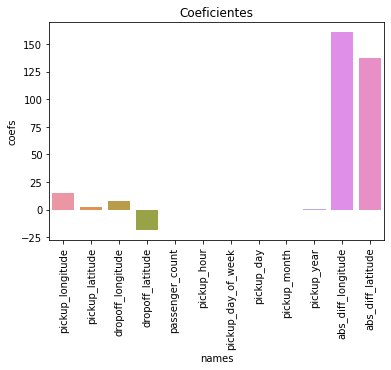

In [74]:
sns.barplot(weights.names,weights.coefs).set_title('Coeficientes')
plt.xticks(rotation=90);

In [75]:
#Remove features correlacionadas
lm.fit(X_train[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']], Y_train)

LinearRegression()

In [76]:
Y_pred = lm.predict(X_test[['passenger_count', 'pickup_hour', 'pickup_day_of_week', 'pickup_day',
       'pickup_month', 'pickup_year','abs_diff_longitude', 'abs_diff_latitude']])

In [77]:
mae = mean_absolute_error(Y_test, Y_pred)
mae

2.378592507703685

In [78]:
r2_score(Y_test, Y_pred)

0.7692029457111699